In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data["label"]  = data[label]
degs_gene_data

<ipython-input-2-cc550c6d2cf5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degs_gene_data["label"]  = data[label]


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


<BarContainer object of 159 artists>

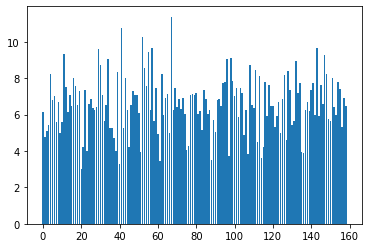

In [3]:
# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=11233,
                                                   shuffle=True)
X_train[:,0]
plt.bar(list(range(159)),X_train[0:159,0])

In [4]:
#feature normalization
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train,y_train)
X_test_mm = mm.transform(X_test)

<BarContainer object of 159 artists>

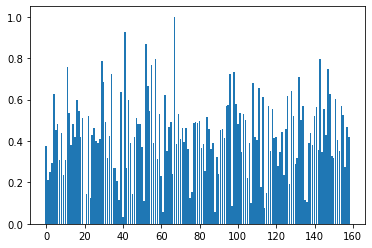

In [5]:
plt.bar(list(range(159)),X_train_mm[0:159,0])

<BarContainer object of 159 artists>

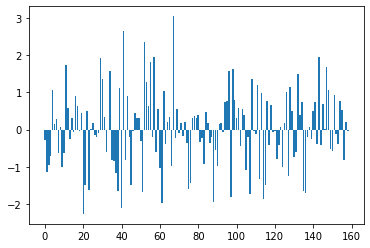

In [6]:
#feature Standardize

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_mm)
X_test_std = sc.transform(X_test_mm)

plt.bar(list(range(159)),X_train_std[0:159,0])

In [7]:
pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,-0.268152,2.199477,-0.469345,-0.519418,-0.639564,-0.093236,0.646176,0.574959,0.461570,-0.382930,...,0.413900,0.839078,0.170450,0.580271,-0.300732,-0.373646,-0.208364,-0.845698,0.297708,0.488540
1,-1.135890,-0.671192,-1.075932,2.023878,1.068459,-0.070710,1.116265,-0.250940,1.021901,-0.312861,...,1.222178,0.254671,0.401584,0.375830,-2.868868,0.396558,0.159676,0.077073,0.047965,0.310558
2,-0.947816,-0.633996,1.114931,1.277350,-0.357383,-0.838417,0.829910,-0.658398,-0.215958,-0.941362,...,0.726144,-0.220554,-0.546626,1.508017,-0.382378,-0.956297,-0.787569,-0.355417,-0.323088,-0.678774
3,-0.719565,0.362399,-2.143392,0.243827,-1.246846,-0.669688,0.868917,-1.691582,-1.062308,-0.672815,...,-0.807537,-0.944197,-0.512579,0.174172,-1.653939,-0.576164,-0.938074,-0.774869,0.097775,0.049314
4,1.068059,2.857002,-0.141297,-0.007207,0.514224,-0.233388,-1.170517,2.363126,0.424755,0.065673,...,-0.776554,-0.708907,-0.270533,-2.539420,0.074983,0.042159,0.345448,-0.625733,1.617765,0.283582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.361567,-0.645124,-0.654710,-0.327197,1.250828,2.029113,0.562801,-0.549707,-0.174255,0.258389,...,0.268005,0.103496,0.141459,0.490462,-1.056953,-0.008787,3.642942,0.310418,-0.225867,-0.296367
175,0.529201,0.061137,0.417405,2.317727,1.173404,-0.541501,-1.172028,-0.571739,0.830116,-0.735402,...,-1.019290,0.175262,0.369226,-0.083100,0.886209,0.593855,1.024975,0.180370,0.234082,0.577765
176,1.224751,1.126371,-0.536873,-0.752321,0.540500,0.222315,-1.120615,0.766014,0.318224,2.213651,...,-0.287035,0.550053,-0.092422,-2.199518,-0.731100,-0.288842,-0.144438,0.266959,0.147433,-0.092073
177,-0.410507,-0.168118,-0.534676,2.684364,0.719797,-0.263984,-1.313719,-0.639316,0.000469,-0.791953,...,-0.503620,-0.839584,-0.142045,-0.206169,0.791205,-0.365001,-0.043300,0.161494,-0.747907,-0.300283


In [8]:
from sklearn import metrics
auc_list = []
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train_mm, y_train)
y_pred = rf.predict(X_test_std)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc_list.append(round(metrics.auc(fpr, tpr),2))
print('Training accuracy:', rf.score(X_train_mm, y_train))
print("non standardize:", rf.score(X_test_mm, y_test))

Training accuracy: 1.0
non standardize: 0.95


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


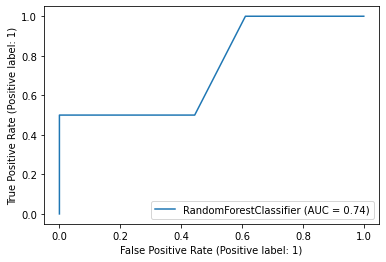

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(rf, X_test_mm, y_test) 

Training accuracy: 1.0
non standardize: 0.95


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


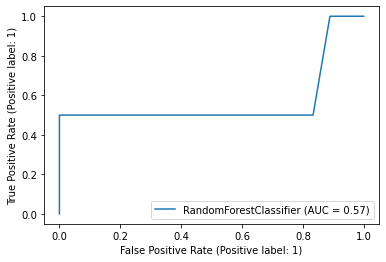

In [10]:
from sklearn import metrics
rf2 = RandomForestClassifier(n_estimators=100, random_state=0)
rf2.fit(X_train_mm, y_train)

print('Training accuracy:', rf2.score(X_train_mm, y_train))
print("non standardize:", rf2.score(X_test_mm, y_test))
metrics.plot_roc_curve(rf2, X_test_mm, y_test) 

Training accuracy: 0.9329608938547486
non standardize: 0.95


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


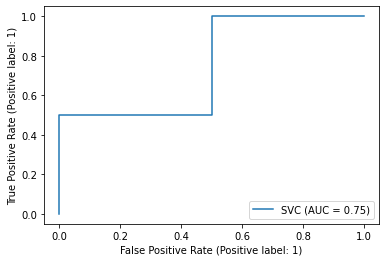

In [11]:
# SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_mm, y_train)
print('Training accuracy:', clf.score(X_train_mm, y_train))
print("non standardize:",clf.score(X_test_mm, y_test))
metrics.plot_roc_curve(clf, X_test_mm, y_test) 

Training accuracy: 0.9162011173184358
non standardize: 0.9


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


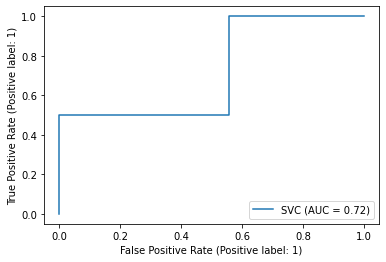

In [12]:
# SVM with rbf kernel
from sklearn.svm import SVC
clf2 = SVC(kernel='rbf')
clf2.fit(X_train_mm, y_train)
print('Training accuracy:', clf2.score(X_train_mm, y_train))
print("non standardize:",clf2.score(X_test_mm, y_test))
metrics.plot_roc_curve(clf2, X_test_mm, y_test) 

Training accuracy: 0.9273743016759777
non standardize: 0.95


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


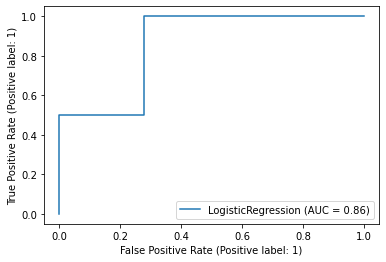

In [13]:
#logistic regression
from sklearn.linear_model import LogisticRegression 
# linear classifier
model = LogisticRegression(penalty="l2", random_state=0)
model.fit(X_train_mm, y_train)
print('Training accuracy:', model.score(X_train_mm, y_train))
print("non standardize:", model.score(X_test_mm, y_test))
metrics.plot_roc_curve(model, X_test_mm, y_test) 

Training accuracy: 0.88268156424581
non standardize: 0.9


C:\Users\vuduc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


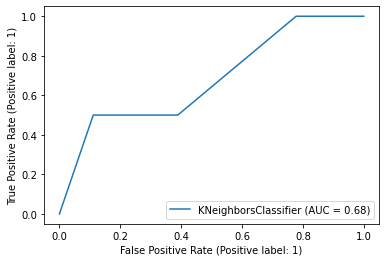

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1)
knn.fit(X_train_mm, y_train)
print('Training accuracy:', knn.score(X_train_mm, y_train))
print("non standardize:", knn.score(X_test_mm, y_test))
metrics.plot_roc_curve(knn, X_test_mm, y_test)

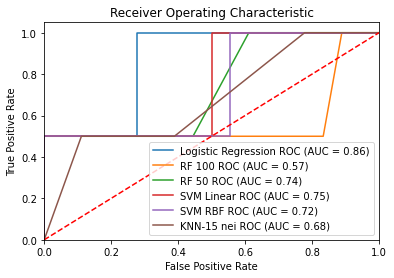

In [15]:
# Plot ROC curve
# fpr, tpr, thresh, auc

models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
    {
        'label' : 'RF 50',
        'model': RandomForestClassifier(n_estimators=50, random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'KNN-15 nei',
        'model': KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1),
    },
]

plt.figure(0).clf()

for m in models:
    model = m['model'] # select the model
    model.fit(X_train_mm, y_train) # train the model
    y_pred=model.predict(X_test_mm) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_mm)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.auc(fpr,tpr)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], auc))
# # Custom settings for the plot 

# for m in models:
#     model = m['model']
#     model.fit(X_train_std, y_train)
#     metrics.plot_roc_curve(m['model'], X_test_std, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    

In [16]:
rf.feature_importances_

array([0.02136457, 0.00466557, 0.01399121, 0.00715407, 0.00604543,
       0.01482351, 0.00545473, 0.01333948, 0.00497304, 0.00331213,
       0.00148779, 0.01315375, 0.        , 0.02836758, 0.01188725,
       0.00796829, 0.0071834 , 0.00530591, 0.00066741, 0.00422707,
       0.00402134, 0.00512388, 0.00411679, 0.01065413, 0.02020184,
       0.00103283, 0.00583315, 0.00153161, 0.00615547, 0.00333693,
       0.0313456 , 0.00298755, 0.00387475, 0.00259487, 0.00910394,
       0.01226917, 0.01350053, 0.00152427, 0.00512431, 0.02551896,
       0.01930138, 0.02006159, 0.01245178, 0.01121325, 0.00551246,
       0.        , 0.01541005, 0.01271598, 0.02776337, 0.00591051,
       0.02553   , 0.00528349, 0.01017674, 0.        , 0.00829791,
       0.00558118, 0.00880636, 0.00138221, 0.01404191, 0.00132606,
       0.01151475, 0.00730389, 0.01063165, 0.00891567, 0.02157958,
       0.00916855, 0.01650904, 0.00453588, 0.00602447, 0.00427219,
       0.01191042, 0.00216184, 0.00314055, 0.00412004, 0.01061

In [17]:
# 10 fold before select feature
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#read data for 10 fold test
## note: X filtered
# df = pd.read_csv(data_file)
# marker_gene = degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]

new_y = degs_gene_data["label"]
new_X = X

# normalize data
mm = MinMaxScaler()
X_new = mm.fit_transform(new_X, new_y)
# standardize
# sc = StandardScaler()
# X_new = sc.fit_transform(X_, new_y)


In [18]:
new_y

0      1
1      0
2      1
3      1
4      1
      ..
194    0
195    0
196    0
197    0
198    0
Name: label, Length: 199, dtype: int64

In [19]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import interp

num_runs = 10

def get_labels (probs, cutoff=0.5):
    size  = np.shape(probs)[0]
    labels = np.zeros(size)
    for i in range (size):
        if (probs[i] < cutoff):
            labels[i] = 0
        else:
            labels[i] = 1
    return labels


In [20]:
# return: Accuracy, Sensitivity, Specificity,  Matthew Correlation Coefficients, and AUC scores.
def evaluate(Y_true, Y_pred, cutoff=0.5):
#     fpr, tpr, thresholds = metrics.roc_curve(Y_true, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
#     auc = metrics.auc(fpr,tpr)
    
    Y_score = get_labels(Y_pred, cutoff)
    mcc = matthews_corrcoef(Y_true, Y_score)
    acc = accuracy_score(Y_true, Y_score)
    auc = roc_auc_score(Y_true, Y_pred)
    cm = confusion_matrix(Y_true, Y_score, labels=[1,0])
    #print(cm)
    tp = cm[0,0]
    fp = cm[1,0]
    tn = cm[1,1]
    fn = cm[0,1]
    ap = tp + fn
    an = tn + fp
    total = ap + an
    # compute Sn and Sp
    sn = tp/ap
    sp = tn/an

    # return TP, FN, FP, TN, total, acc, Sn, Sp, MCC, AUC
    return  np.array([acc, sn, sp, mcc, auc])

In [21]:
np.linspace(0, 1, 51)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [22]:
def cross_validation(X, y, model, num_folds=10, random_state=0, n_runs=1, verbose=False, threshold=0.5):
    res = np.zeros(shape=(num_folds * n_runs, 5)) # 5 number of metrics
    base_fpr = np.linspace(0, 1, 51) #add a new parameter for 51
    tprs = []
    
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, random_state=random_state, shuffle=True)
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            train_filtered = X_train
            test_filtered = X_test
            
            try:
                Y_pred = model.fit(train_filtered, y_train).predict_proba(test_filtered)[:,1]
            except:
                Y_pred = model.fit(train_filtered, y_train).predict(test_filtered)
                
            res[count, :] = evaluate(test_filtered, y_test, Y_pred, cutoff=threshold)
            
#             fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(test_filtered)[:,1])
#             fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_std)[:,1])
            fpr, tpr, _ = roc_curve(y_test, Y_pred)
            tpr = interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)
            count += 1

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)

    rVal = {}
    rVal['metrics'] = np.mean(res, axis=0)
    rVal['metrics_std'] = np.std(res, axis=0)
    rVal['fpr'] = base_fpr
    rVal['tpr'] = mean_tprs
    return rVal

TypeError: evaluate() got multiple values for argument 'cutoff'

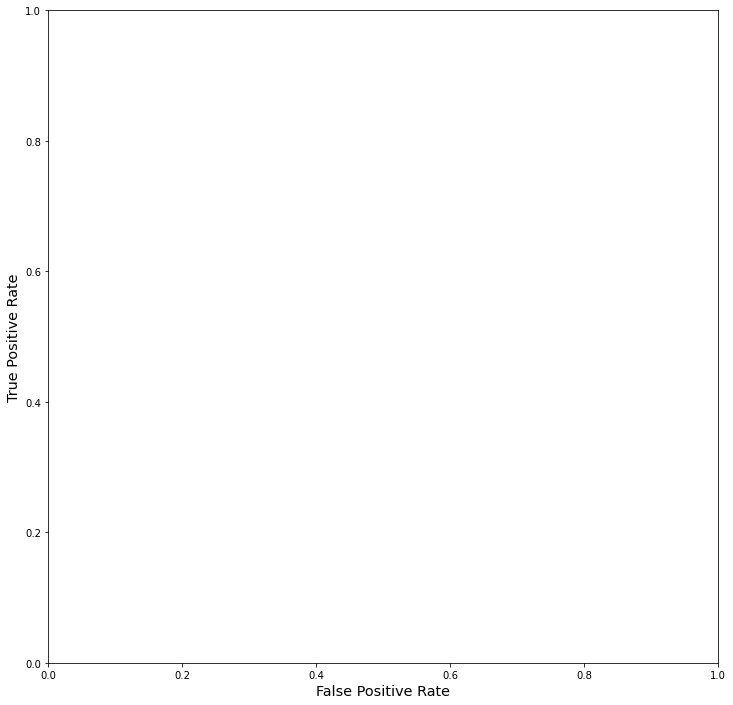

In [23]:
# do 10fold classification
plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
for m in models:
    model = m['model']
    res = cross_validation(X_new, new_y, model, num_folds=10, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][4],2)), linewidth=2)
leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

# Feature selection with Sequence Forward Selection 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression 
# Set random seed
seed = 10
np.random.seed(seed)
# xgboost = XGBClassifier(max_depth = )
sfs1 = SFS(rf,
          k_features = 10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          n_jobs=-1,
          cv=10)

# sfs1 = sfs1.fit(X_train_mm, y_train)

In [ ]:
# 10-fold get feature importance
def get_most_importance_feature(model, X_new, new_y, num_features, cv):
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, random_state=random_state, shuffle=True)
        for train_index, test_index in skf.split(X_new,new_y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            train_filtered = X_train
            test_filtered = X_test
            sfs1 = SFS(
                  model,
                  k_features = num_features,
                  forward=True,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=cv)
            try:
                sfs1 = sfs1.fit(train_filtered, new_y)
            except:
                print("Some thing wrong check your input")
            
            collect_gene = degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]
                
                
            
    

In [ ]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

In [ ]:
# plot
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)

df = pd.DataFrame.from_dict(metric_dict).T

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(metric_dict, kind='std_dev')
plt.title('sequentail forward selection (w.stdDev)')
plt.grid()
plt.show()

In [ ]:
list(sfs1.k_feature_idx_)

In [ ]:
degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]

In [ ]:
# train with same dataset


In [ ]:
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=11233,
                                                   shuffle=True)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train_df

In [ ]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train_df.iloc[:,list(sfs1.k_feature_idx_)], y_train)
X_test_mm = mm.transform(X_test_df.iloc[:,list(sfs1.k_feature_idx_)])

#feature Standardize

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_mm)
X_test_std = sc.transform(X_test_mm)

# plt.bar(list(range(179)),X_train_std[0:179,0])

In [ ]:
X_train_std.shape

In [ ]:
X_train_mm.shape

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
rf2 = RandomForestClassifier(n_estimators=50, random_state=0)
rf2.fit(X_train_mm, y_train)

# roc/auc data
# y_pred = rf2.predict(X_test_std)
# fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test,y_pred)

print('Training accuracy:', rf2.score(X_train_mm, y_train))
print("Test acc:", rf2.score(X_test_mm, y_test))
metrics.plot_roc_curve(rf2, X_test_mm, y_test) 

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100, random_state=0)
rf2.fit(X_train_mm, y_train)
# rf2.score(X_test_std2, y_test2)
print('Training accuracy:', rf2.score(X_train_mm, y_train))
print("Test acc:", rf2.score(X_test_mm, y_test))
metrics.plot_roc_curve(rf2, X_test_mm, y_test) 



In [ ]:
# Using SVM to test feature selection
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_mm, y_train)
print('Training accuracy:', clf.score(X_train_mm, y_train))
print("non standardize:",clf.score(X_test_mm, y_test))
metrics.plot_roc_curve(clf, X_test_mm, y_test) 

In [ ]:

# Using SVM to test feature selection
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train_mm, y_train)
print('Training accuracy:', clf.score(X_train_mm, y_train))
print("non standardize:",clf.score(X_test_mm, y_test))
metrics.plot_roc_curve(clf, X_test_mm, y_test) 

In [ ]:
from sklearn.linear_model import LogisticRegression 
# linear classifier
model = LogisticRegression(penalty="l2", random_state=0)
model.fit(X_train_mm, y_train)
print('Training accuracy:', model.score(X_train_mm, y_train))
print("non standardize:", model.score(X_test_mm, y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(model, X_test_mm, y_test) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1)
knn.fit(X_train_mm, y_train)
print('Training accuracy:', knn.score(X_train_mm, y_train))
print("non standardize:", knn.score(X_test_mm, y_test))
metrics.plot_roc_curve(knn, X_test_mm, y_test) 

In [ ]:
# Plot ROC curve
# fpr, tpr, thresh, auc

models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
    {
        'label' : 'RF 50',
        'model': RandomForestClassifier(n_estimators=50, random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'KNN-15 nei',
        'model': KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1),
    },
]

plt.figure(0).clf()

for m in models:
    model = m['model'] # select the model
    model.fit(X_train_mm, y_train) # train the model
    y_pred=model.predict(X_test_mm) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_mm)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.auc(fpr,tpr)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], auc))
# # Custom settings for the plot 

# for m in models:
#     model = m['model']
#     model.fit(X_train_std, y_train)
#     metrics.plot_roc_curve(m['model'], X_test_std, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#read data for 10 fold test
## note: X filtered
# df = pd.read_csv(data_file)
marker_gene = degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]
new_df = degs_gene_data[marker_gene].copy()
new_y = degs_gene_data["label"]
new_X = new_df.values

# normalize data
mm = MinMaxScaler()
X_new = mm.fit_transform(new_X, new_y)
# standardize
# sc = StandardScaler()
# X_new = sc.fit_transform(X_, new_y)


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(X_train.shape)

In [ ]:
# do 10fold classification
plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
for m in models:
    model = m['model']
    res = cross_validation(X_new, new_y, model, num_folds=10, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][4],2)), linewidth=2)
leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()